# Uber Rideshare Predictive Pricing

## Exploratory Data Analysis

The first step is to conduct an exploratory data analysis (EDA), to identify trends, patterns, and outliers in the dataset. Note: Only Uber data will be used in this analysis and the upcoming modelling.


First, we import the necessary Python libraries.

In [73]:
#@title Imports for Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the CSV using Pandas and taking a quick look inside the dataset below.

In [74]:

df = pd.read_csv('../data/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [75]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [76]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
cab_types = df['cab_type'].unique()
print(cab_types)

['Lyft' 'Uber']


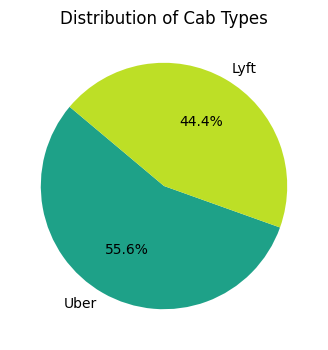

In [77]:
cab_type_counts = df['cab_type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(cab_type_counts, labels=cab_type_counts.index, autopct='%1.1f%%', startangle=140, colors = ['#1ea188', '#bddf26'])
plt.title('Distribution of Cab Types')
plt.show()

Creating a Pandas DataFrame with only Uber records, as we will be only using Uber data in our model development.

In [78]:
df2 = df[df['cab_type'] != 'Lyft'].copy()
new_cab_types = df2['cab_type'].unique()
print(new_cab_types)

['Uber']


Next, we will check for null values, and then replace them with the mean of the other not null values in that column.

In [79]:
print(df2.isnull().sum())
print(df2.isnull().sum().sum())

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [80]:
percentage_missing = df['price'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in the Uber price column: {percentage_missing}%")

Percentage of missing values in the Uber price column: 7.949402009317949%


Although only a small percentage of values in the price column are missing, the corresponding records will be dropped instead of imputed - imputing a large number of missing values with a single value can lead to reduced accuracy and overfitting (since it may not reflect the real-world distribution of prices).

In [81]:
df2 = df[df['price'].notna()]
print(df2.isnull().sum())
print(df2.isnull().sum().sum())

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Now, we will visualize our data. First, is the number of rides per month. The data only contains data from November to December 2018, as apparent.

Text(0.5, 1.0, 'Ride Count per Month')

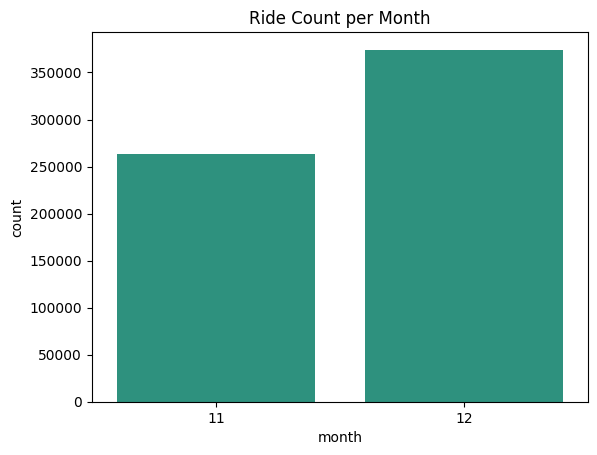

In [82]:
sns.countplot(x='month', data=df2, color='#1ea188')
df2['month'].value_counts()
plt.title('Ride Count per Month')

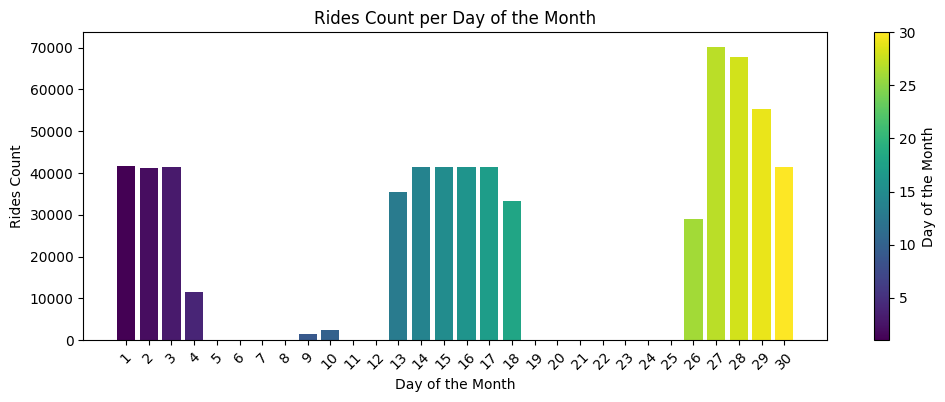

In [83]:
rides_per_day = df2['day'].value_counts().sort_index()
rides_per_day = rides_per_day.reindex(range(1, 31), fill_value=0)  
norm = plt.Normalize(1, 30)  
colors = plt.cm.viridis(norm(rides_per_day.index))
fig, ax = plt.subplots(figsize=(12, 4))

ax.bar(rides_per_day.index, rides_per_day.values, color=colors)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Day of the Month')

ax.set_xlabel('Day of the Month')
ax.set_ylabel('Rides Count')
ax.set_title('Rides Count per Day of the Month')  # Corrected title
ax.set_xticks(range(1, 31))
ax.set_xticklabels(range(1, 31), rotation=45)

plt.show()

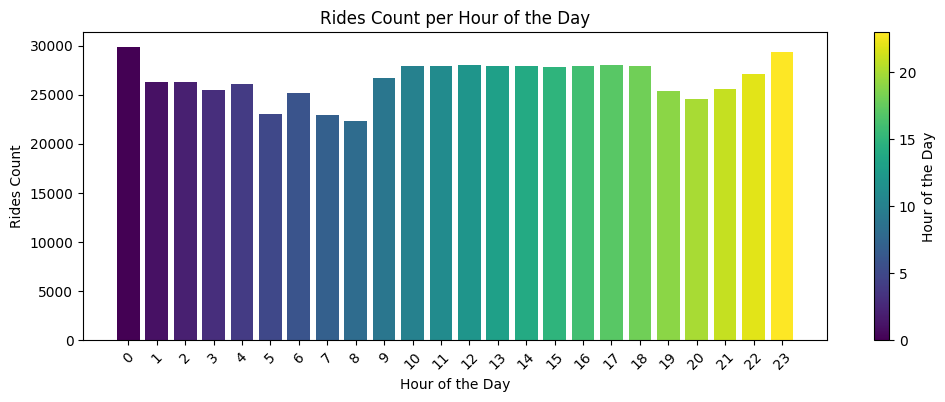

In [84]:
rides_per_hour = df2['hour'].value_counts().sort_index()
rides_per_hour = rides_per_hour.reindex(range(0, 24), fill_value=0)  
norm = plt.Normalize(0, 23)  
colors = plt.cm.viridis(norm(rides_per_hour.index))
fig, ax = plt.subplots(figsize=(12, 4))

ax.bar(rides_per_hour.index, rides_per_hour.values, color=colors)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Hour of the Day')

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Rides Count')
ax.set_title('Rides Count per Hour of the Day')  # Corrected title
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24), rotation=45)

plt.show()


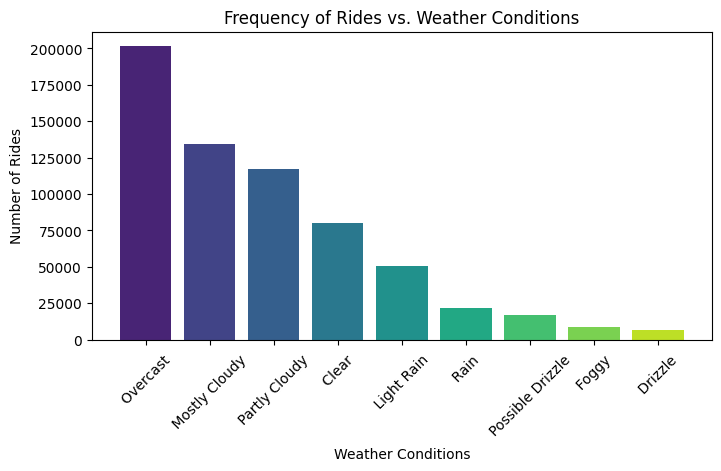

In [85]:
ride_counts_by_weather = df2['short_summary'].value_counts()
ride_counts_by_weather = ride_counts_by_weather.sort_values(ascending=False)
n_colors = ride_counts_by_weather.size  # Number of unique weather conditions
palette = sns.color_palette("viridis", n_colors)

plt.figure(figsize=(8, 4))
bars = plt.bar(ride_counts_by_weather.index, ride_counts_by_weather.values, color=palette)

plt.title('Frequency of Rides vs. Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()

Now, we'll take a look at the distribution of price, and also how the distance of the trip affects it.

In [86]:
df2_describe = pd.DataFrame(df2['price'])
df2_describe.describe()

,price
count,637976.000000
mean,16.545125
std,9.324359
min,2.500000
25%,9.000000
50%,13.500000
75%,22.500000
max,97.500000


In [87]:
df2_describe = pd.DataFrame(df2['distance'])
df2_describe.describe()

,distance
count,637976.000000
mean,2.189261
std,1.135413
min,0.020000
25%,1.270000
50%,2.160000
75%,2.930000
max,7.860000


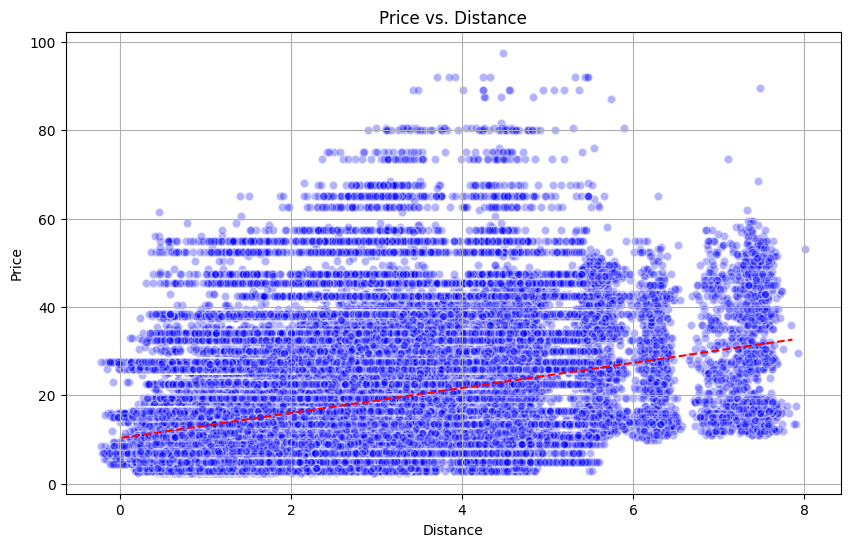

In [88]:
z = np.polyfit(df2['distance'], df2['price'], 1)
p = np.poly1d(z)

# Jitter the 'distance' values slightly to reduce overplotting
distance_jittered = df2['distance'] + np.random.normal(0, 0.1, size=len(df2))

plt.figure(figsize=(10, 6))
plt.scatter(distance_jittered, df2['price'], alpha=0.3, edgecolor='w', color='blue')

plt.plot(np.sort(df2['distance']), p(np.sort(df2['distance'])), "r--")

plt.title('Price vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Unfortunately, it's difficult to discern patterns in the above scatter plot, because the data is from is a large dataset which results in overplotting

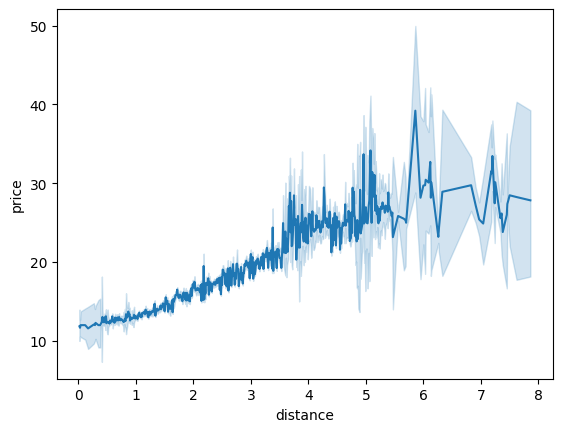

In [89]:
sns.lineplot( x=df2['distance'] , y=df2['price'])
plt.show()

Now, upon completing our exploratory data analysis, we can make more informed decisions when cleaning our data and building models.

## Data Preprocessing

The next step is data preprocessing. This is a critical step where our data is transformed to a more suitable format for analysis and modeling. It helps to improve the accuracy of the model by cleaning the data and handling missing values. This sets the stage for developing robust, efficient, and accurate predictive models.

In [17]:
df = pd.read_csv('../data/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [18]:
#Identify number of null values per column in the database
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [19]:
#Drop rows that have a null value in the price column
df = df[df['price'].notna()]
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [20]:
#Remove duplicates in the ID column
df = df.drop_duplicates('id')

In [21]:
# Check for duplicate rows
duplicates = df.duplicated()
duplicates_num = duplicates.sum()

print(duplicates_num)

0


In [22]:
# Reduce data to only contain longitude between -180 and 180, and latitude between -90 and 90
df = df[(df['longitude'] > -180) & (df['longitude'] < 180)]
df = df[(df['latitude'] > -90) & (df['latitude'] < 90)]

In [23]:
# Drop unnecessary Lyft data
df = df[df['cab_type'] != 'Lyft']

df['cab_type']

12        Uber
13        Uber
14        Uber
15        Uber
16        Uber
          ... 
693065    Uber
693066    Uber
693067    Uber
693069    Uber
693070    Uber
Name: cab_type, Length: 330568, dtype: object

In [24]:
# Remove duplicate column

(df['visibility'] == df['visibility.1']).all()
df.drop('visibility.1', axis=1, inplace=True)

In [25]:
# Removing outliers in the numerical columns

columns_to_check = ['price', 'distance', 'surge_multiplier', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']

outliers = {}
for column in columns_to_check:
    mean = df[column].mean()
    std = df[column].std()
    outliers_mask = (df[column] < mean - 3 * std) | (df[column] > mean + 3 * std)
    outliers[column] = df[column][outliers_mask]

for column, outliers_data in outliers.items():
    if not outliers_data.empty:
        print(f"Outliers in column '{column}':")
        print(outliers_data)
        print("\n")

Outliers in column 'price':
2104      42.0
2143      46.5
2219      50.5
2567      41.5
2686      56.0
          ... 
692103    49.5
692205    42.0
692439    47.0
692962    51.0
693007    49.5
Name: price, Length: 2380, dtype: float64


Outliers in column 'distance':
516       7.46
2214      7.34
2215      7.34
2216      7.34
2218      7.34
          ... 
693005    7.36
693006    7.36
693007    7.36
693008    7.36
693009    7.36
Name: distance, Length: 3192, dtype: float64


Outliers in column 'temperature':
61        18.97
116       19.28
566       18.97
686       18.97
817       18.97
          ...  
690952    19.28
692920    18.97
692921    18.97
692922    18.97
692923    18.97
Name: temperature, Length: 2576, dtype: float64


Outliers in column 'precipIntensity':
42        0.1299
68        0.1299
204       0.0920
238       0.1267
241       0.1088
           ...  
692738    0.1264
692739    0.1264
692804    0.1289
692805    0.1289
692806    0.1289
Name: precipIntensity, Length: 1314

In [26]:
# Separate the Datetime column into time, year, month, date and day of the week

df['datetime'] = pd.to_datetime(df['datetime'])

df['time'] = df['datetime'].dt.strftime('%H:%M')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.strftime('%B')
df['day'] = df['datetime'].dt.day
df['day_of_week'] = df['datetime'].dt.dayofweek 

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_of_week'] = df['day_of_week'].map(day_names)

# Reorder columns to ensure time/ date columns are together
df = df[['id', 'timestamp', 'day_of_week', 'month', 'day', 'year', 'time', 'datetime', 'hour',  'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']]
df.head()

,id,timestamp,day_of_week,month,day,year,time,datetime,hour,timezone,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
12,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,Friday,November,30,2018,22:13,2018-11-30 22:13:01,22,America/New_York,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
13,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,Thursday,December,13,2018,10:50,2018-12-13 10:50:11,10,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,Thursday,December,13,2018,19:15,2018-12-13 19:15:03,19,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
15,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,Sunday,December,16,2018,23:55,2018-12-16 23:55:11,23,America/New_York,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
16,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,Friday,December,14,2018,00:40,2018-12-14 00:40:07,0,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


Upon initial examination, several columns in the dataset exhibit little variability and may not contribute significantly to the analysis. These columns include:

- **year**: All the data in the dataset was collected in 2018. Since there is no variation in the year column, it does not provide any useful information for analysis.

- **month**: The data spans the months of November and December. As a result, the month column will not show significant correlations in this analysis due to the limited range of values.

- **timezone**: The timezone for all records is consistent and set to America/New_York, indicating that the data was collected in Boston. Since there is no variation in timezone, it does not add value to the analysis.

- **cab_type**: The dataset exclusively contains Uber data. Since there is only one cab type present (Uber), the cab type column does not provide any differentiation among records and hence does not contribute to the analysis.

- **surge_multiplier**: For Uber rides, the surge multiplier remains constant at 1. This feature is pertinent to different cab types but remains unvarying for Uber in this dataset. Therefore, it does not provide any discriminatory power for analysis.

- **short-summary**: Both short-summary and long summary are extra text. Icon can describe the same feature in less text. These columns can be revisited if icon has a large impact.

- **long-summary**: Same reasoning as short-summary.

- **product_id**: This column contains cryptic codes that cannot be deciphered without additional context. Given the lack of meaningful interpretation and variability, the product_id column will not be considered for analysis.

- **latitude & longitude**: The latitude and longitude data is redundant, as it is clear that the data is within the Boston region.


By excluding these columns from the analysis, we can focus on features that exhibit variability and are more likely to contribute meaningfully to the predictive models or analytical insights derived from the dataset.

In [28]:
# drop unnecessary features 
features_drop = ['year', 'timezone', 'cab_type', 'surge_multiplier', 'product_id', 'month', 'short_summary', 'long_summary', 'latitude', 'longitude']
df = df.drop(features_drop, axis=1)

In [29]:
# Save cleaned dataframe
df.to_csv('cleaned_data.csv', index=False)


## Feature Engineering

Feature engineering is a crucial step that involves selecting, changing, or creating new features from raw data to help our model perform better. By doing this, the data is presented in a way that helps the algorithm find patterns more easily, leading to better accuracy, efficiency, and understanding of the model. Feature engineering helps align the data with specific insights unique to the field, allowing the algorithm to take advantage of its strengths and minimize its weaknesses. This step is essential in improving the predictive capability of our model.

In [33]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,id,timestamp,day_of_week,day,time,datetime,hour,source,destination,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,Friday,30,22:13,2018-11-30 22:13:01,22,North End,West End,UberXL,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,Thursday,13,10:50,2018-12-13 10:50:11,10,North End,West End,Black,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,Thursday,13,19:15,2018-12-13 19:15:03,19,North End,West End,UberX,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,Sunday,16,23:55,2018-12-16 23:55:11,23,North End,West End,WAV,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,Friday,14,00:40,2018-12-14 00:40:07,0,North End,West End,Black SUV,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [35]:
df.shape

(330568, 49)

### Plotting Feature with Price

We created a correlation matrix of all features to help provide a clear overview of how features relate to each other and to the target variable, helping to identify potential predictors for the model. It aids in spotting multicollinearity, where two or more features are highly correlated and could destabilize model estimates. It can also reveal unexpected relationships between variables, offering insights that could drive more informed feature selection and engineering decisions.

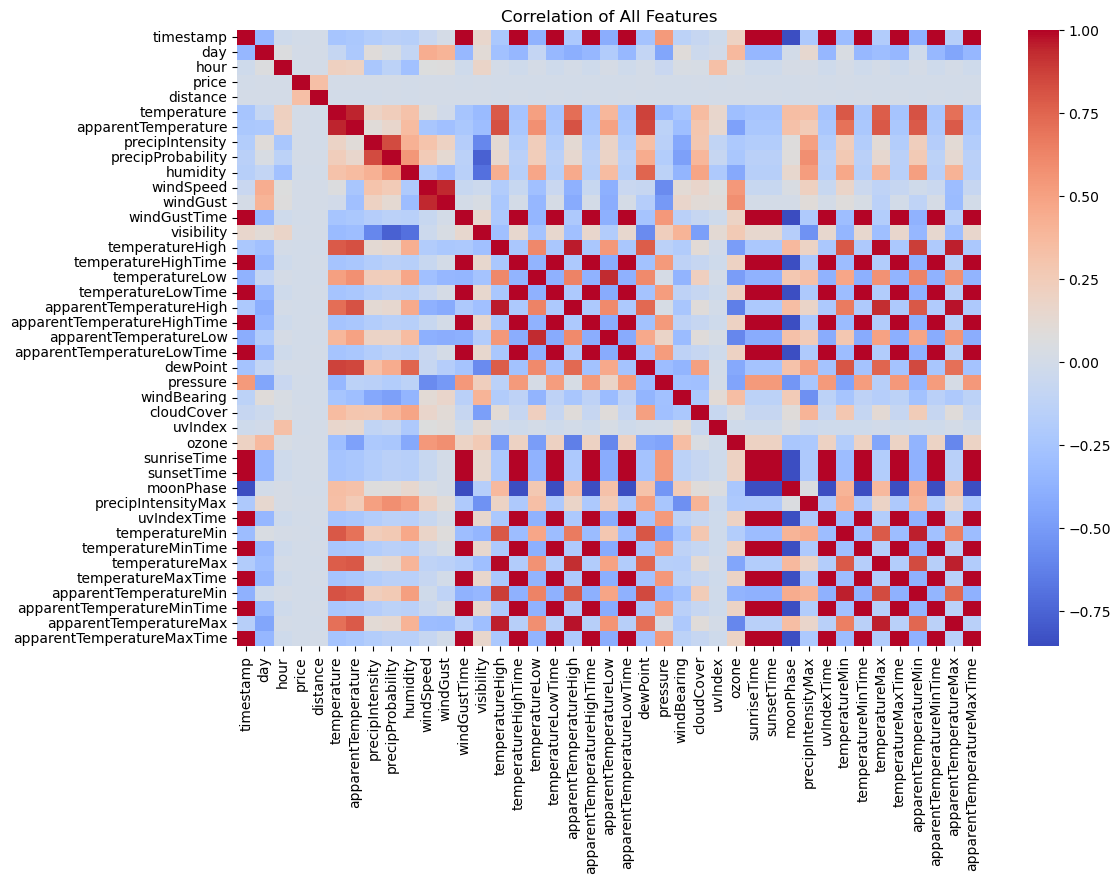

In [681]:
# initially lets start off by determining the correlation of all features
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm')
plt.title("Correlation of All Features")
plt.show()

Although, since our focus is more features affect on price we created correlation matrix of price with numerical features. This is to shows how each feature potentially impacts the target variable. This allows for targeted feature selection, which efficiently narrows down the list of features to those with significant correlations, either positive or negative, with price. 

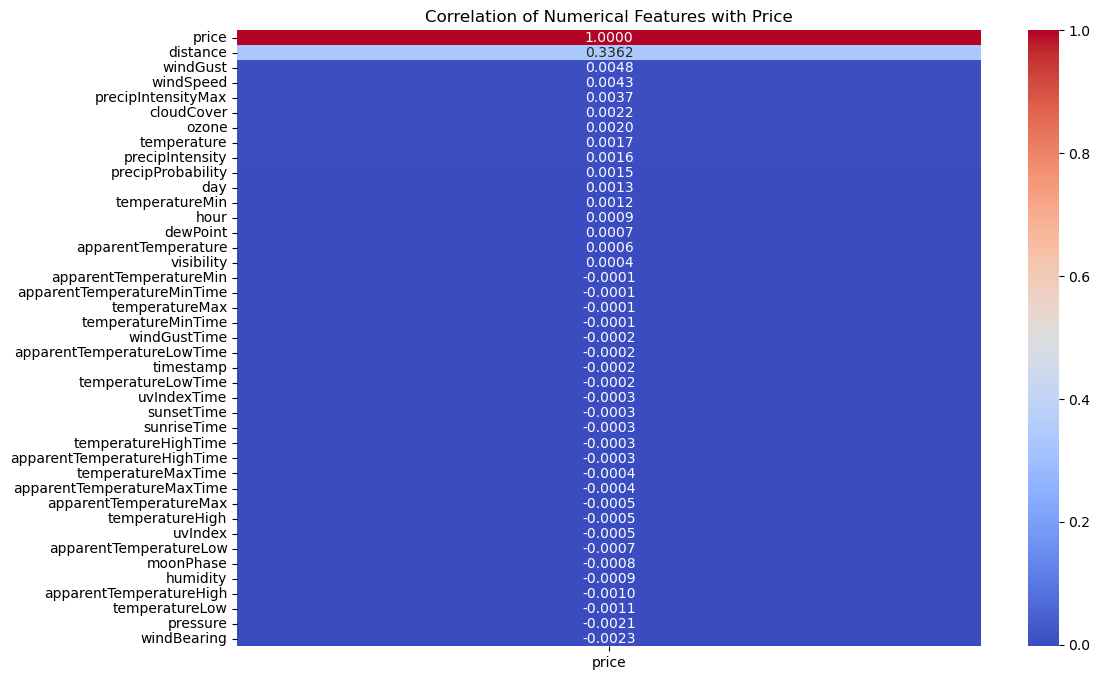

In [682]:
# then lets determine the correlation of price with numerical features
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
corr_with_price = corr_matrix[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_with_price, annot=True, fmt=".4f", cmap='coolwarm', cbar=True)
plt.title("Correlation of Numerical Features with Price")
plt.show()

Referencing the graph, we identified that distance has the most significant impact on price. While other features do have an effect, they are not as influential as distance.

We also examined the relationship between price and categorical features, particularly those related to name, icon, source, and destination.

<Axes: xlabel='price', ylabel='name'>

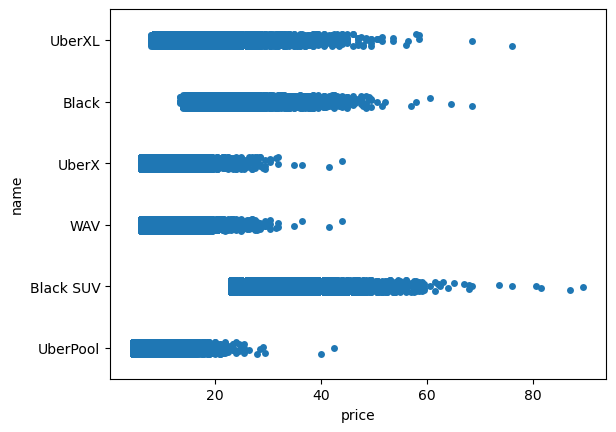

In [683]:
sns.stripplot(data=df, x='price', y='name')

Analyzing the prices for different Uber service types, like UberX, UberXL, and Black, we can see that premium services such as Black SUV usually have a higher price range, while standard services like UberX typically have a lower price. However, we can also notice that within each service category, there is a considerable degree of variability in pricing, indicating that other factors beyond service type play a role in determining the final price. 

<Axes: xlabel='price', ylabel='icon'>

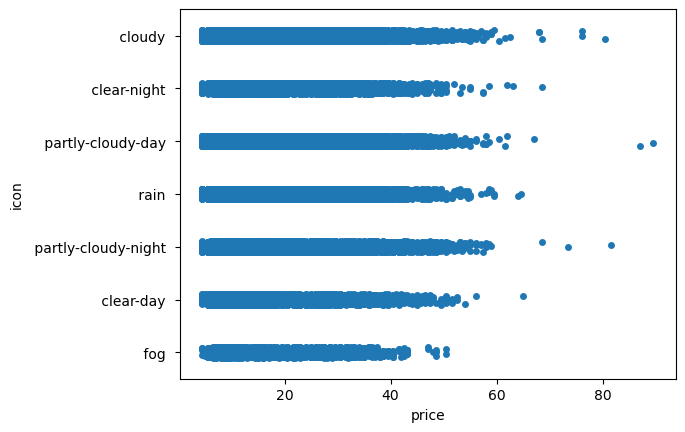

In [684]:
sns.stripplot(data=df, x='price', y='icon')

The graph indicates that weather conditions have varying impacts on pricing. For instance, 'fog' might have slight narrower price distribution, while 'rain' shows a wider spread. This could imply that weather conditions affect pricing, likely due to higher demand or slower traffic leading to longer trip times.

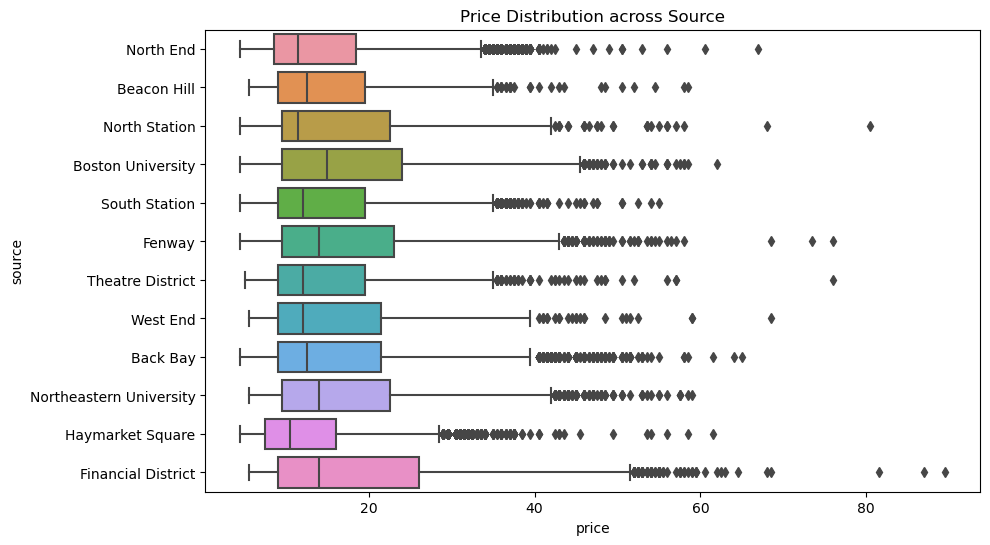

In [685]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price', y='source')
plt.title("Price Distribution across Source")
plt.show()

The price distribution across different source locations indicates that certain areas consistently have higher or lower prices. For example, the Financial District stands out with generally higher prices, while North End or Beacon Hill show less variability in pricing. This could be because rides originating from the Financial District are generally longer on average, or there might be higher demand for rides in that area, leading to increased prices. Similarly, shorter trips from North End or Beacon Hill could result in lower variability in pricing.

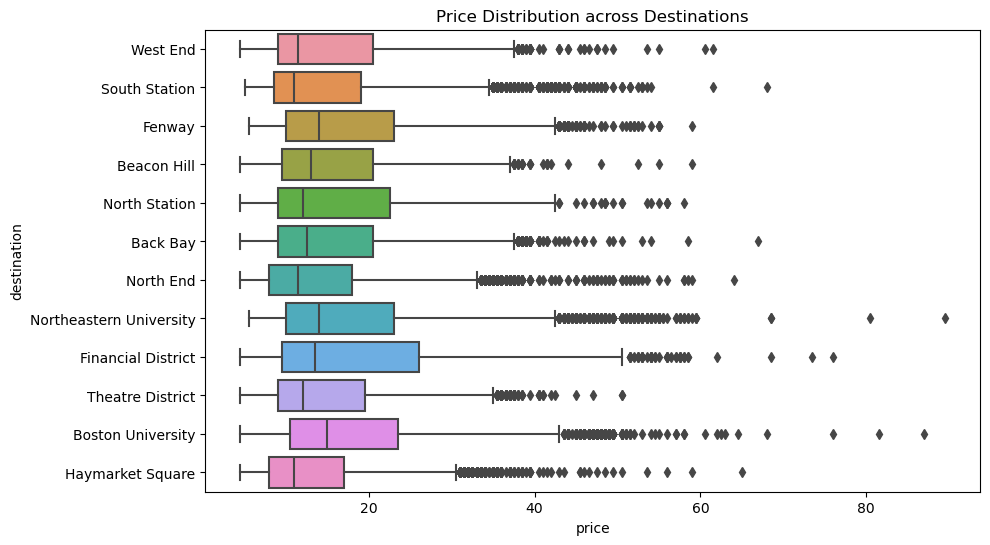

In [686]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price', y='destination')
plt.title("Price Distribution across Destinations")
plt.show()

 Similar to source locations, the destination plot shows that some areas have a broader range of prices. For instance, Northeastern University shows a more extensive range of prices among destinations, which could be because of various trip origins or times of travel to this location.


### Label Encoding

We are using Label Encoder to help the model understand different factors that affect the price. This method helps us turn text data into numbers that the model can understand, which is important for using categorical predictors in regression analysis. Even though these categories don't have any inherent order, transforming them into numbers helps the algorithm to understand how they influence the target variable, which in this case is the price. This enriches the dataset with important information that wasn't previously numeric. By using this approach, we can include a variety of categorical factors, like source or destination, in our predictive model. This improves the model's ability to capture complex patterns and relationships in the data, which is essential for accurate price prediction.

In [687]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df.dtypes

id                              object
timestamp                      float64
day_of_week                     object
day                              int64
time                            object
datetime                        object
hour                             int64
source                          object
destination                     object
name                            object
price                          float64
distance                       float64
temperature                    float64
apparentTemperature            float64
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                       float64
windGustTime                     int64
visibility                     float64
temperatureHigh                float64
temperatureHighTime              int64
temperatureLow                 float64
temperatureLowTime               int64
apparentTemperatureHigh  

In [688]:
columns = ['day_of_week', 'time', 'datetime', 'source','destination','name', 'icon']

columns_to_print = {'name', 'icon'}

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])
    
    if column in columns_to_print:
        print(f"Class mapping of {column}: ")
        for i, item in enumerate(label_encoder.classes_):
            print(f"{item} --> {i}")

Class mapping of name: 
Black --> 0
Black SUV --> 1
UberPool --> 2
UberX --> 3
UberXL --> 4
WAV --> 5
Class mapping of icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [689]:
# shows that object datatypes have been converted
df.head()

,id,timestamp,day_of_week,day,time,datetime,hour,source,destination,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,0,30,1189,8565,22,6,11,4,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,4,13,562,17198,10,6,11,0,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,4,13,1034,18045,19,6,11,3,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,3,16,1279,25775,23,6,11,5,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,35,18593,0,6,11,1,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [690]:
# check for any null values
df.isnull().sum()

id                             0
timestamp                      0
day_of_week                    0
day                            0
time                           0
datetime                       0
hour                           0
source                         0
destination                    0
name                           0
price                          0
distance                       0
temperature                    0
apparentTemperature            0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureLowTime     0
icon                           0
dewPoint  

### Recursive Feature Elimination (RFE)

In order to improve the accuracy and efficiency of our Uber pricing model, we use a technique called Recursive Feature Elimination (RFE) after label encoding. RFE is a systematic approach that refines the set of features used in the model by evaluating their contribution to the model's performance. This means that only the variables with the most significant impact on predicting prices are retained, making the model simpler and less computationally demanding. 

By focusing on the most relevant features, RFE also makes the model more interpretable. This method provides insights into the dataset by evaluating feature importance against model accuracy, which guides us towards a more informed, data-driven understanding of the key determinants of Uber pricing. This targeted feature selection is crucial for developing a predictive model that is both accurate and practical, making RFE an invaluable tool in our modeling process.

In [691]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE

In [692]:
#Assign predictors as X (Note id is removed from this as it is a unique identifier of the data)
X = df.drop(columns=['price', 'id'])
#Assign the target (y) to price as that is what we are trying to predict
y = df['price']

We began with all available features to evaluate the model's performance by examining testing errors (R^2, MSE, MAE) and based on these outcomes, strategically decided to either add or remove features. This approach allowed us to fine-tune the feature set for optimal balance, aiming for improved predictive accuracy and model efficiency by directly linking feature selection to quantifiable measures of error.

#### Accuracy of all features (49)

In [693]:
# Split the data into 20% test and 80% train a common split that will give an averaged result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [694]:
#Display the size of test/training data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(264454, 47) (66114, 47) (264454,) (66114,)


In [695]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print("R^2 score:", metrics.r2_score(y_test, predictions))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions))

R^2 score: 0.4142772089124509
Mean Squared Error (MSE): 42.75833868517134
Mean Absolute Error (MAE): 5.349299585870297


#### Accuracy of 30 features

In [696]:
rfe = RFE(estimator=reg, n_features_to_select=30, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.


Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.


In [697]:
XX = X[X.columns[rfe.support_]]

In [698]:
XX.columns

Index(['day_of_week', 'day', 'hour', 'source', 'destination', 'name',
       'distance', 'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'cloudCover',
       'uvIndex', 'moonPhase', 'precipIntensityMax', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

In [699]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20, random_state = 0)

In [700]:
reg1 = LinearRegression()
reg1 = reg1.fit(X_train, y_train)

predictions1 = reg1.predict(X_test)

print("R^2 score:", metrics.r2_score(y_test, predictions1))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions1))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions1))

R^2 score: 0.4143610705774151
Mean Squared Error (MSE): 42.75221670131173
Mean Absolute Error (MAE): 5.348769802334526


### Accuracy of 20 features

In [701]:
rfe = RFE(estimator=reg, n_features_to_select=20, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.


Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.


In [702]:
XX = X[X.columns[rfe.support_]]

In [703]:
XX.columns

Index(['source', 'name', 'distance', 'temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windGust',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'icon',
       'dewPoint', 'cloudCover', 'uvIndex', 'moonPhase', 'precipIntensityMax',
       'temperatureMax', 'apparentTemperatureMax'],
      dtype='object')

In [704]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20, random_state = 0)

In [705]:
reg2 = LinearRegression()
reg2 = reg2.fit(X_train, y_train)

In [706]:
predictions2 = reg2.predict(X_test)

print("R^2 score:", metrics.r2_score(y_test, predictions2))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions2))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions2))

R^2 score: 0.41442192803101663
Mean Squared Error (MSE): 42.74777404746215
Mean Absolute Error (MAE): 5.3484107201855355


### Accuracy of 10 features

In [707]:
rfe = RFE(estimator=reg, n_features_to_select=10, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.


Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

In [708]:
XX = X[X.columns[rfe.support_]]

In [709]:
XX.columns

Index(['name', 'distance', 'precipIntensity', 'precipProbability',
       'temperatureHigh', 'apparentTemperatureHigh', 'moonPhase',
       'precipIntensityMax', 'temperatureMax', 'apparentTemperatureMax'],
      dtype='object')

In [710]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20, random_state = 0)

In [711]:
reg3 = LinearRegression()
reg3 = reg3.fit(X_train, y_train)

In [712]:
predictions3 = reg3.predict(X_test)

print("R^2 score:", metrics.r2_score(y_test, predictions3))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions3))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions3))

R^2 score: 0.4144684433126976
Mean Squared Error (MSE): 42.74437838624081
Mean Absolute Error (MAE): 5.347693388463468


We analyzed the accuracy of our Uber pricing model with varying numbers of features, specifically from 30 down to 10. What we observed was that as we reduced the number of features, there was a consistent improvement in performance metrics such as R^2, MSE, and MAE. This suggested that the model became more efficient and accurate with fewer, more impactful features. 

Further analysis showed that a set of features consistently contributed to the model's performance across different configurations (name, distance), indicating their significant predictive power for Uber pricing. Therefore, we decided to test the model's accuracy with just two features. This was driven by our desire to understand how much we could simplify the model without sacrificing accuracy.

### Accuracy of 2 features

In [713]:
rfe = RFE(estimator=reg, n_features_to_select=2, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.


Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

In [714]:
XX = X[X.columns[rfe.support_]]

In [715]:
XX.columns

Index(['name', 'distance'], dtype='object')

In [716]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20, random_state = 0)

In [717]:
reg4 = LinearRegression()
reg4 = reg4.fit(X_train, y_train)

In [718]:
predictions4 = reg4.predict(X_test)

print("R^2 score:", metrics.r2_score(y_test, predictions4))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions4))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions4))

R^2 score: 0.41451236282866444
Mean Squared Error (MSE): 42.74117221846456
Mean Absolute Error (MAE): 5.347386089812287


After analyzing the results of R^2, MSE, and MAE, we found that our model was most accurate when using just two features with name and distance. However, we don't believe that a model with just two features would be effective for predicting Uber pricing, as there are likely many other factors that could have a significant impact on pricing. 

### Recursive Feature Elimination with Cross Validation (RFECV)

To further explore which features are optimal and have the most significant impact on predicting Uber pricing, we decided to use Recursive Feature Elimination with Cross Validation (RFECV). This approach involves systematically dropping features, including name and distance, and evaluating which of the remaining features have the most impact on pricing. 

RFECV combines the efficiency of recursive feature elimination with the robustness of cross-validation. This allows us to identify the features that significantly affect pricing beyond the initial two that we identified earlier. By using this method, we can ensure that the feature set we end up with is not only optimal in terms of model performance but also validated across multiple subsets of data. This provides a well-rounded view of feature importance and model stability.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error

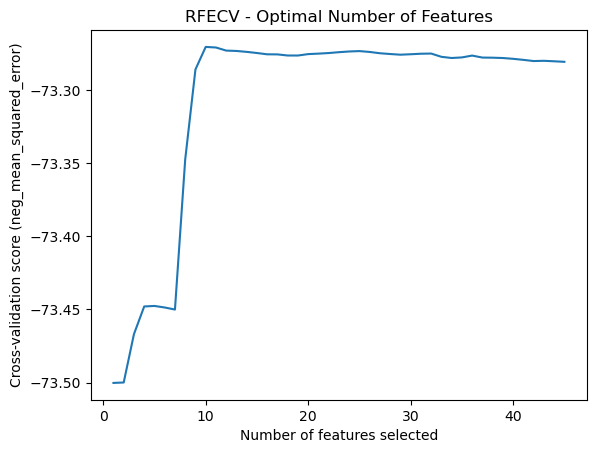

Optimal number of features: 10
Features selected by RFECV: Index(['source', 'destination', 'precipIntensity', 'humidity',
       'temperatureHigh', 'apparentTemperatureHigh', 'uvIndex',
       'precipIntensityMax', 'temperatureMax', 'apparentTemperatureMax'],
      dtype='object')
MSE with RFECV selected features: 72.25468540208657


In [723]:
X = df.drop(columns=['price', 'id', 'name', 'distance'])
y = df['price']

# Splitting dataset into training and testing parts for demonstration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Initialize RFECV
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit RFECV
rfecv.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title('RFECV - Optimal Number of Features')
plt.show()

# Optimal number of features
print("Optimal number of features:", rfecv.n_features_)

# Features selected by RFECV
features_selected_rfecv = X_train.columns[rfecv.support_]
print("Features selected by RFECV:", features_selected_rfecv)

# Evaluating performance with the selected features
model.fit(X_train[features_selected_rfecv], y_train)
y_pred = model.predict(X_test[features_selected_rfecv])
mse = mean_squared_error(y_test, y_pred)
print("MSE with RFECV selected features:", mse)


After applying RFECV, it identified 10 additional features that are optimal for predicting Uber pricing. This selection makes sense considering the many factors that can influence ridesharing prices beyond just the name and distance, which are typically the most obvious. For example, weather conditions (represented by features like humidity, temperature, and precipitation) can significantly affect demand and, consequently, pricing due to their impact on travel conditions. Similarly, the source and destination locations provide critical geographical context that influences pricing through factors like distance, typical traffic patterns, and area-specific demand. 

The inclusion of apparent temperature alongside actual temperature accounts for human perception of weather, further refining the model's ability to predict customer behavior and pricing dynamics. The RFECV process ensures that the selected features are robust by validating them through cross-validation to contribute positively to the model's predictive accuracy. 

The resulting Mean Squared Error (MSE) of 72.2547 with these features indicates the model's performance with this refined feature set, offering a comprehensive view of the factors that drive Uber pricing. This approach underscores the complexity of pricing models and the importance of including a diverse set of features. 

### Drop Features

In [724]:
columns_to_keep = ['price', 'name', 'distance', 'source', 'destination', 'precipIntensity', 'humidity',
                   'temperatureHigh', 'apparentTemperatureHigh', 'uvIndex',
                   'precipIntensityMax', 'temperatureMax', 'apparentTemperatureMax']
df = df[columns_to_keep]

In [725]:
df.shape

(330568, 13)

### Final Model

In [726]:
df.head()

,price,name,distance,source,destination,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,uvIndex,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,12.0,4,1.11,6,11,0.0000,0.60,42.52,40.53,0,0.0003,42.52,40.53
1,16.0,0,1.11,6,11,0.0000,0.66,33.83,32.85,0,0.0001,33.83,32.85
2,7.5,3,1.11,6,11,0.0000,0.56,33.83,32.85,0,0.0001,33.83,32.85
3,7.5,5,1.11,6,11,0.0567,0.86,43.83,38.38,0,0.1252,43.83,38.38
4,26.0,1,1.11,6,11,0.0000,0.64,33.83,32.85,0,0.0001,33.83,32.85


In [727]:
df.to_csv('./data_feature_engineering.csv', index=False)